In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
len(iris.data)

150

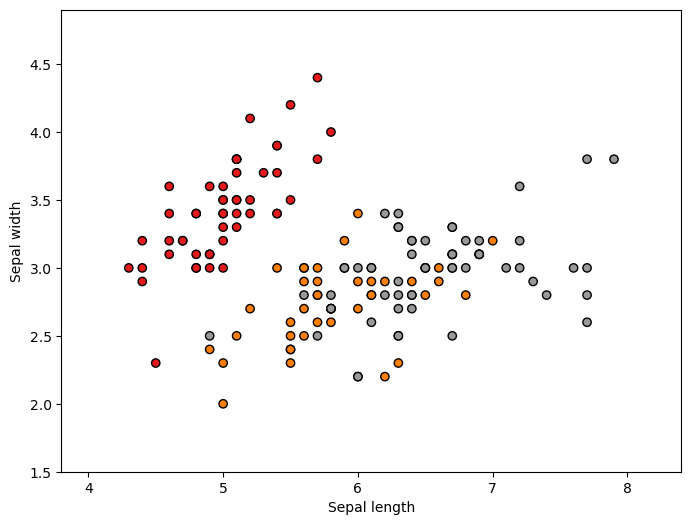

In [9]:
X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize = (8, 6))

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

### SKLearn 라이브러리를 이용한 KNN 수행

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [11]:
iris = load_iris()
X = iris.data[:, :]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y, random_state = 70)

In [12]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(105, 4)
(105,)
(45, 4)
(45,)


In [13]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
prediction = clf.predict(X_test)

In [15]:
prediction

array([1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       1])

In [16]:
y_test

array([1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       1])

In [17]:
(prediction == y_test).mean()

0.9555555555555556

In [18]:
test_acc = []

limit = 30

for n in range(1, limit + 1):
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    test_acc.append((prediction == y_test).mean())

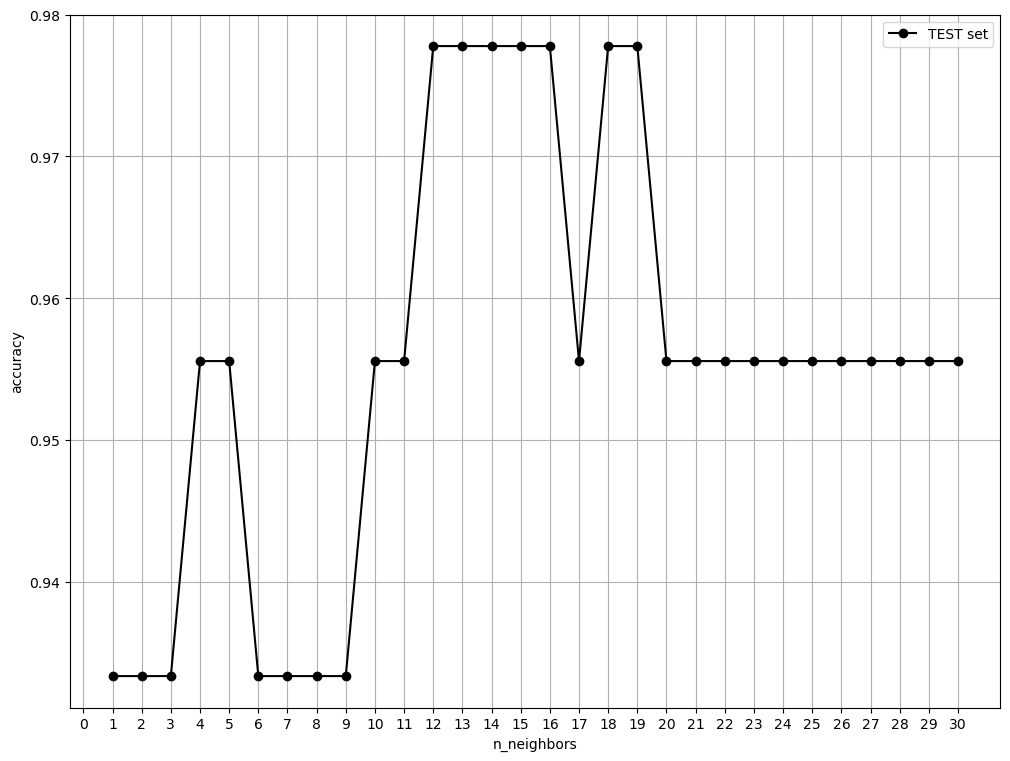

In [19]:
plt.figure(figsize = (12, 9))
plt.plot(range(1, limit + 1), test_acc, 'ko-', label = 'TEST set')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.xticks(np.arange(0, limit + 1, step = 1))

plt.grid()
plt.legend()

In [29]:
clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [30]:
prediction = clf.predict(X_test)

In [31]:
prediction

array([1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       1])

In [32]:
y_test

array([1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       1])

In [33]:
(prediction == y_test).mean()

0.9777777777777777

In [34]:
# from mpl_toolkits.mplot3d import Axes3D

# xs = X_train[:, 0]
# ys = X_train[:, 1]
# zs = X_train[:, 2]

# fig = plt.figure(figsize = (6, 6))
# ax = fig.add_subplot(111, projection = '3d')
# ax.view_init(30, 120)
# ax.scatter(xs, ys, zs, c = y_train)
# ax.set_xlabel(iris.feature_names[0])
# ax.set_ylabel(iris.feature_names[1])
# ax.set_zlabel(iris.feature_names[2])
# ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c = prediction, edgecolor = 'red')

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

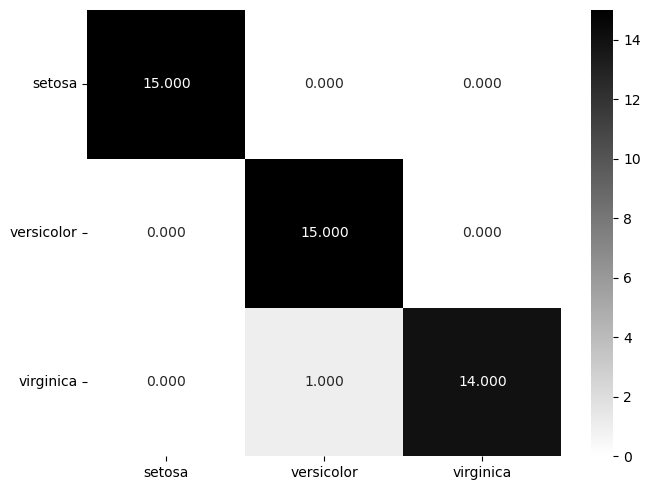

In [36]:
X_lab = iris.target_names
y_lab = iris.target_names

conf_matrix = confusion_matrix(y_test, prediction)

plt.figure(figsize = (7, 5))
aa = sns.heatmap(conf_matrix, xticklabels = X_lab, yticklabels = y_lab, annot = True, fmt = ".3f", cmap = plt.cm.binary)
plt.yticks(rotation = 'horizontal')
plt.tight_layout()

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.9375    1.0000    0.9677        15
           2     1.0000    0.9333    0.9655        15

    accuracy                         0.9778        45
   macro avg     0.9792    0.9778    0.9778        45
weighted avg     0.9792    0.9778    0.9778        45

